<a href="https://colab.research.google.com/github/Dywinar/dz_3_ML/blob/main/ML_one_my_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

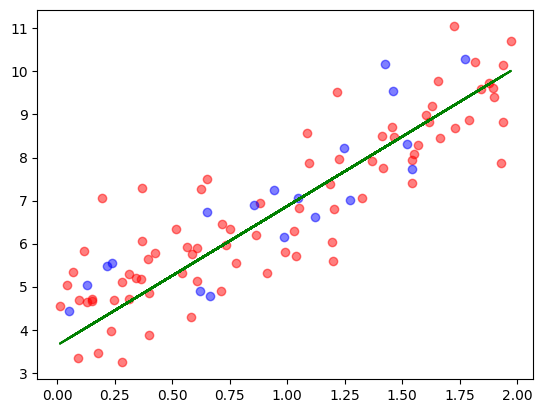

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_train = X[:81]
X_test = X[81:]
# X_train = (X[:81] - X[:81].mean(axis=0)) / X[:81].std(axis = 0)
# X_test = (X[81:] - X[81:].mean(axis=0)) / X[81:].std(axis = 0) можно  с нормализацией но график отображается частично
Y_train = y[:81,0]
Y_test = y[81:,0]
plt.scatter(X_train,Y_train, color='red', alpha=0.5, label='Тренировочные данные')
plt.scatter(X_test,Y_test, color='blue', alpha=0.5, label='Тестовые данные')
epochs = 17000
mse_test = []
mse_train = []
samples, features = X_train.shape
w = np.zeros(features)
w0 = 0
lr = 0.0001
for i in range(epochs):
  predict = X_train @ w + w0
  w += 2*lr*(1 / samples)* X_train.T @ ( Y_train - predict)
  w0 += 2*lr*( 1/ samples) * np.sum(Y_train - predict)
  # вычисляем ошибки
  mse_train.append(np.mean((Y_train - predict)**2))
  y_pred_test = X_test @ w + w0
  mse_test.append(np.mean((Y_test -y_pred_test)**2))
def pred(X):
  return X @ w + w0
# plt.plot(range(epochs), mse_train, label='Ошибки тренеровки')
# plt.plot(range(epochs), mse_test, label='Ошибки теста')
# print(mse_train[-1]) #Ошибка тестовых данных: 0.8738635916584394
# print(mse_test[-1]) #Ошибка тренеровочных данных: 0.8823570841623316
plt.plot(X,pred(X), color='green', label='Линейная регрессия')
plt.show()